In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
data = loadtxt('MAD.dat')

In [10]:
data = data.T
cooling = np.array([lm for lm in data if lm[3] == 14])
heating = np.array([lm2 for lm2 in data if lm2[3] == 10])

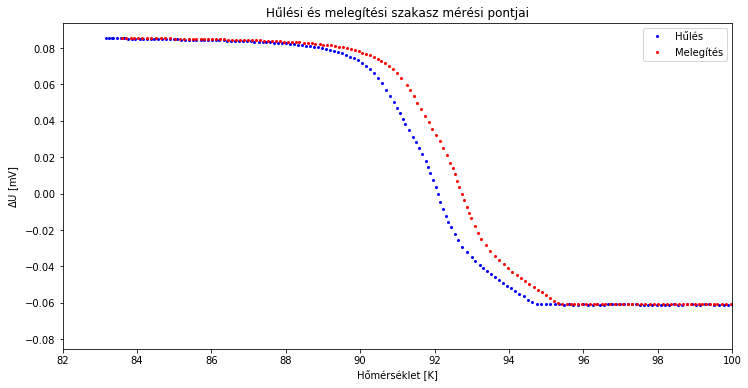

In [13]:
plt.figure(figsize(12,6))
plt.plot(cooling[:,0], cooling[:,1]*0.3, 'bo', ms=2)
plt.plot(heating[:,0], heating[:,1]*0.3, 'ro', ms=2)
plt.xlim(82,100)
xlabel('Hőmérséklet [K]')
ylabel('$\Delta$U [mV]')
plt.legend(('Hűlés', 'Melegítés'))
title('Hűlési és melegítési szakasz mérési pontjai')

savefig('./coolingAndHeating.png')

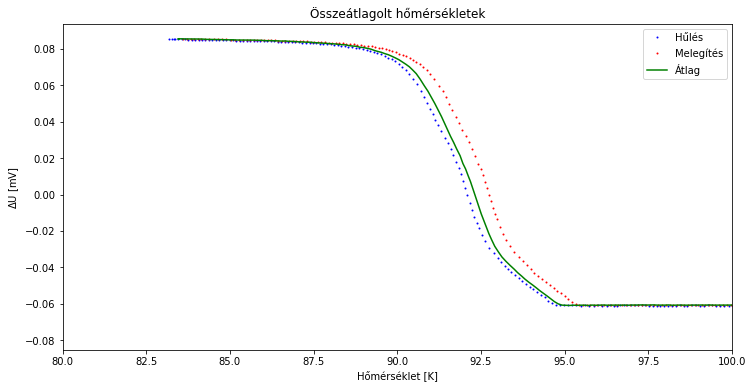

In [14]:
plt.figure(figsize(12,6))
plt.plot(cooling[:,0], cooling[:,1]*0.3, 'bo', ms=1)
plt.plot(heating[:,0], heating[:,1]*0.3, 'ro', ms=1)
plt.plot((heating[:,0] + cooling[:len(cooling) - 213:-1,0])/2., heating[:,1]*0.3, 'g-', ms=4)
plt.xlim(80,100)
xlabel('Hőmérséklet [K]')
ylabel('$\Delta$U [mV]')
title('Összeátlagolt hőmérsékletek')
plt.legend(('Hűlés','Melegítés','Átlag'))

savefig('./coolingAndHeatingWithMean.png')

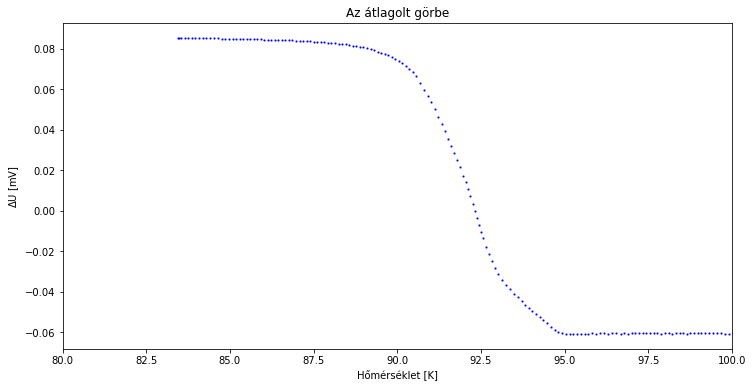

In [15]:
plt.figure(figsize(12,6))
plt.plot((heating[:,0] + cooling[:len(cooling) - 213:-1,0])/2., heating[:,1]*0.3, 'bs', ms=1)
plt.xlim(80,100)
xlabel('Hőmérséklet [K]')
ylabel('$\Delta$U [mV]')
title('Az átlagolt görbe')

savefig('./theMeanPlot.png')

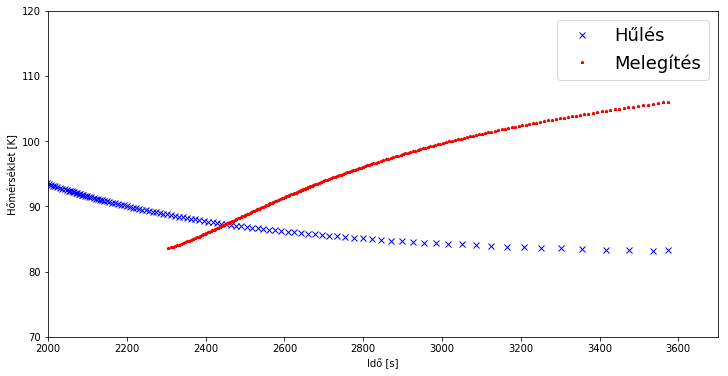

In [49]:
plt.figure(figsize(12,6))
plt.plot(cooling[:,2], cooling[:,0], 'bx', ms=6)
plt.plot(heating[:,2] - (heating[len(heating)-1,2] - cooling[len(cooling)-1,2]), heating[::1,0], 'r*', ms=3)
xlabel('Idő [s]')
ylabel('Hőmérséklet [K]')
plt.xlim(2000,3700)
plt.ylim(70,120)

plt.legend(('Hűlés','Melegítés'), fontsize=18)

savefig('./tempCoolingHeating.png')

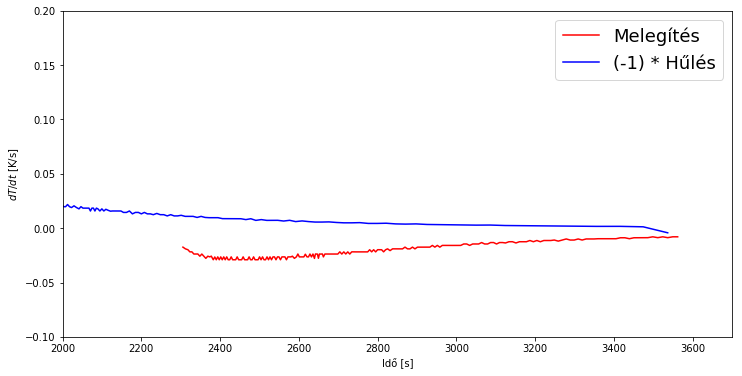

In [77]:
hulesDeriv = []
for i in range(0, len(cooling)-1):
    deriv = (cooling[i+1][0] - cooling[i][0])/(cooling[i+1][2] - cooling[i][2])
    hulesDeriv.append(np.array([cooling[i][2], deriv]))

melegDeriv = []
for i in range(0, len(heating)-1):
    deriv = (heating[i][0] - heating[i+1][0])/(heating[i+1][2] - heating[i][2])
    melegDeriv.append(np.array([heating[i][2], deriv]))
    
hulesDeriv = np.array(hulesDeriv)
melegDeriv = np.array(melegDeriv)
plt.plot(melegDeriv[:,0] - (heating[len(heating)-1,2] - cooling[len(cooling)-1,2]), melegDeriv[:,1], 'r-', ms=3)
plt.plot(hulesDeriv[:,0], -hulesDeriv[:,1], 'b-', ms=3)

plt.xlim(2000,3700)
plt.ylim(-0.1, 0.2)

xlabel('Idő [s]')
ylabel('$dT/dt$ [K/s]')

plt.legend(('Melegítés', '(-1) * Hűlés'), fontsize=18)

savefig('./derivTempCoolingHeating.png')

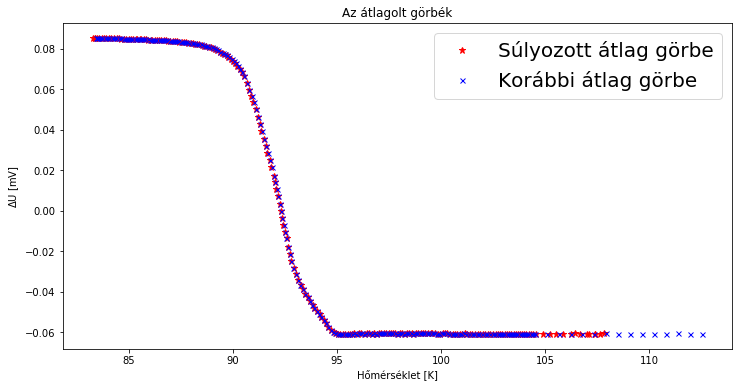

In [88]:
sulyozottAtlag = []

for i in range(0, len(melegDeriv)):
    egyPerOssz = 1. / (-melegDeriv[i][1] - hulesDeriv[len(hulesDeriv) - len(melegDeriv) + i -1][1])
    temperature = -melegDeriv[i][1]*egyPerOssz*heating[i][0] - hulesDeriv[len(hulesDeriv) - len(melegDeriv) + i -1][1]*egyPerOssz*cooling[len(cooling) - 1 - i][0]
    temperatureMena = heating[i][0]*0.5 + cooling[len(cooling) - 1 - i ][0]*0.5
    sulyozottAtlag.append(np.array([heating[i][1], temperature]))

sulyozottAtlag = np.array(sulyozottAtlag)
# derivaltakkal sulyozott atlag
plt.figure(figsize(12,6))
plt.plot(sulyozottAtlag[:,1], sulyozottAtlag[:,0]*0.3, 'r*', ms=7)
plt.plot((heating[:,0] + cooling[:len(cooling) - 213:-1,0])/2., heating[:,1]*0.3, 'bx', ms=5)
#plt.xlim(90,99)
xlabel('Hőmérséklet [K]')
ylabel('$\Delta$U [mV]')
title('Az átlagolt görbék')

plt.legend(('Súlyozott átlag görbe', 'Korábbi átlag görbe'), 
          fontsize=20)

savefig('./weightedMeanPlot.png')

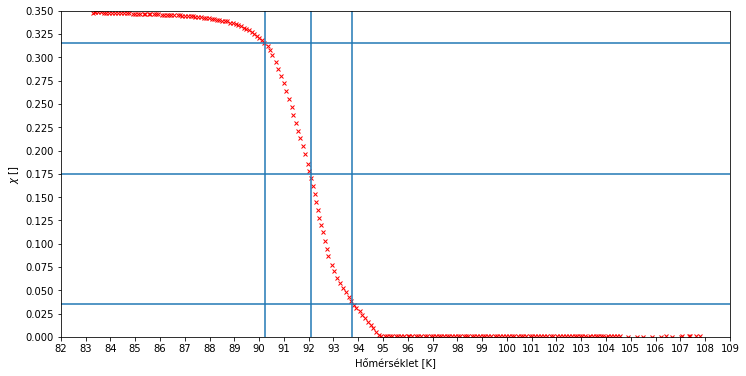

In [116]:
# U_0 = ( .42445 +/- .001 ) * 10 mV
szuszcepti = []
for i in range(0, len(sulyozottAtlag)):
    szuszc = 300/22 * 0.3 * sulyozottAtlag[i][0] * 1/5.7445
    szuszcepti.append(np.array([sulyozottAtlag[i][1], szuszc]))
szuszcepti = np.array(szuszcepti)
plt.plot(szuszcepti[:,0], szuszcepti[:,1]+0.145, 'rx', ms=4)
plt.ylim(0,0.35)
xlabel('Hőmérséklet [K]')
ylabel('$\chi$ []')

plt.axvline(90.25)
plt.axhline(0.315)

plt.axhline(0.035)
plt.axvline(93.75)

plt.axhline(0.175)
plt.axvline(92.1)

plt.xticks(np.arange(82, 110, step=1))
plt.yticks(np.arange(0, 0.36, step=0.025))

savefig('./szuszcepti.png')